In [ ]:
from scipy.stats import ttest_1samp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()


Saving supermarket_sales new.csv to supermarket_sales new (1).csv


{'supermarket_sales new (1).csv': b'Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%\r\nFemale,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.415\r\nFemale,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.82\r\nFemale,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.652\r\nFemale,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.78\r\nFemale,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.626\r\nFemale,692-92-5582,B,Mandalay,Member,Food and beverages,54.84,3,8.226\r\nFemale,351-62-0822,B,Mandalay,Member,Fashion accessories,14.48,4,2.896\r\nFemale,365-64-0515,A,Yangon,Normal,Electronic accessories,46.95,5,11.7375\r\nFemale,829-34-3910,A,Yangon,Normal,Health and beauty,71.38,10,35.69\r\nFemale,299-46-1805,B,Mandalay,Member,Sports and travel,93.72,6,28.116\r\nFemale,656-95-9349,A,Yangon,Member,Health and beauty,68.93,7,241.255\r\nFemale,319-50-3348,B,Mandalay,Normal,Home and lifestyle,40.3,2,04.0

In [ ]:
data=pd.read_csv('supermarket_sales new.csv')
data

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.4150
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.6520
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.6260
...,...,...,...,...,...,...,...,...,...
995,Male,745-74-0715,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030
996,Male,690-01-6631,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450
997,Male,233-67-5758,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175
998,Male,727-02-1313,A,Yangon,Member,Food and beverages,31.84,1,1.5920


In [ ]:
data.copy()

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.4150
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.6520
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.6260
...,...,...,...,...,...,...,...,...,...
995,Male,745-74-0715,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030
996,Male,690-01-6631,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450
997,Male,233-67-5758,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175
998,Male,727-02-1313,A,Yangon,Member,Food and beverages,31.84,1,1.5920


In [ ]:
data.isnull().sum()

,0
Gender,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0


In [ ]:
duplicates=data.drop_duplicates()
duplicates

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.4150
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.6520
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.6260
...,...,...,...,...,...,...,...,...,...
995,Male,745-74-0715,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030
996,Male,690-01-6631,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450
997,Male,233-67-5758,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175
998,Male,727-02-1313,A,Yangon,Member,Food and beverages,31.84,1,1.5920


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [ ]:
data.describe()

,Unit price,Quantity,Tax 5%
count,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,43.911392
std,26.494628,2.923431,100.551612
min,10.080000,1.000000,1.066000
25%,32.875000,3.000000,6.222500
50%,55.230000,5.000000,12.404000
75%,77.935000,8.000000,27.226250
max,99.960000,10.000000,985.000000


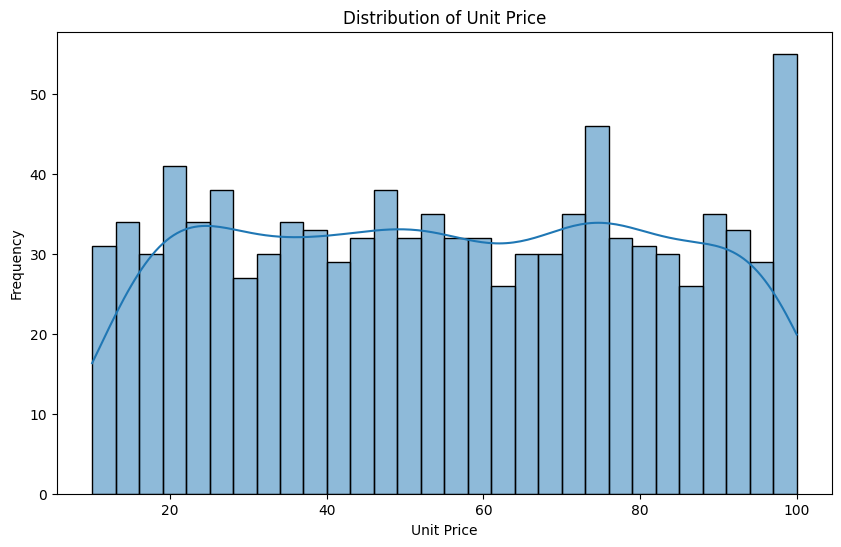

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Unit Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Unit price'], bins=30, kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


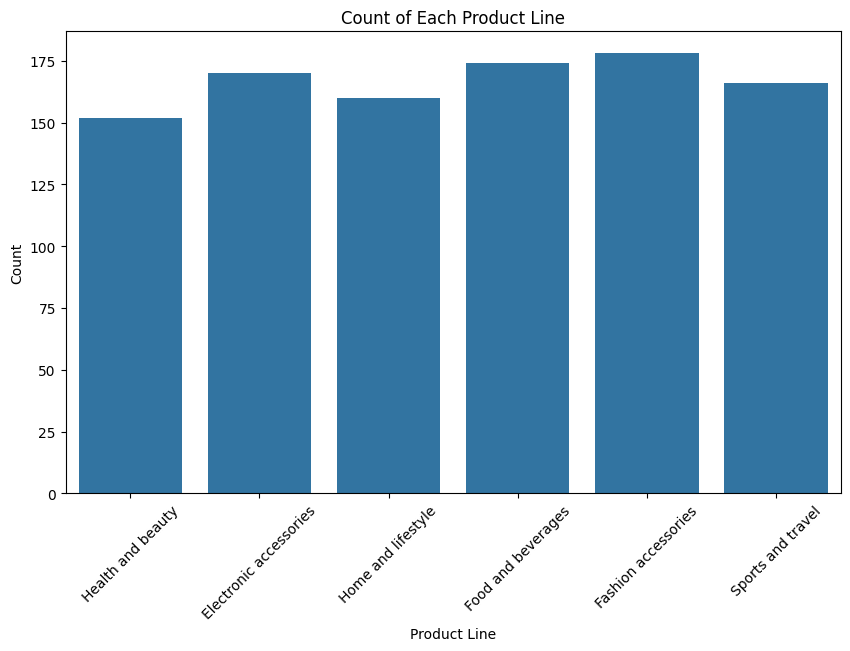

In [ ]:
# Bar Chart for Product Line
plt.figure(figsize=(10, 6))
sns.countplot(x='Product line', data=data)
plt.title('Count of Each Product Line')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


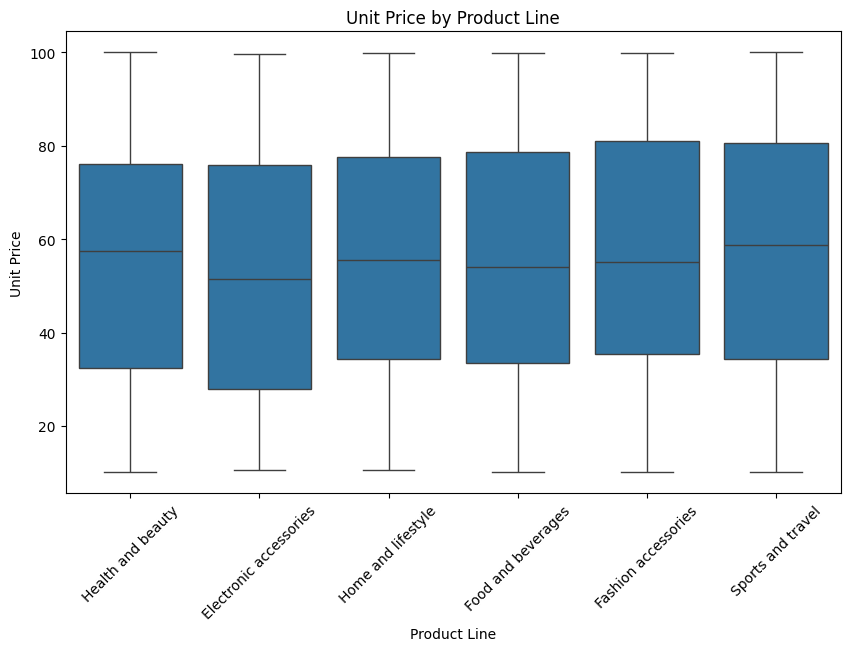

In [ ]:
# Box Plot for Unit Price by Product Line
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Unit price', data=data)
plt.title('Unit Price by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()


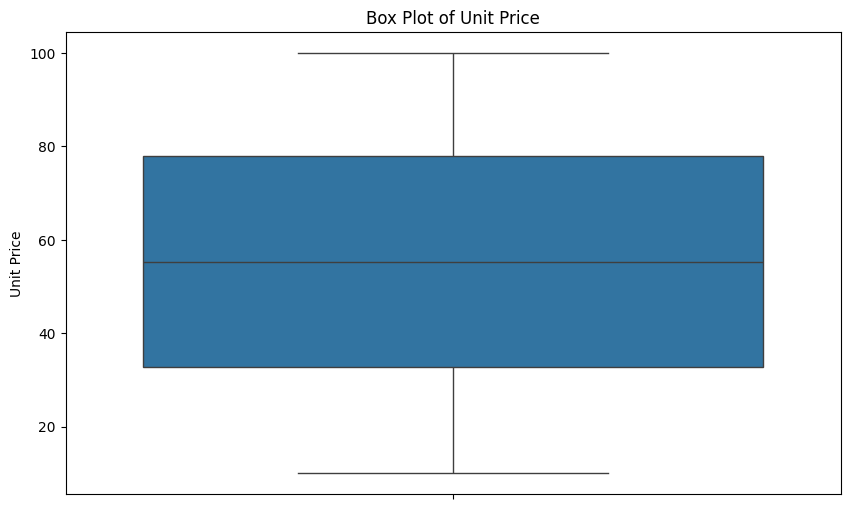

In [ ]:
# Box Plot for Unit Price
plt.figure(figsize=(10, 6))
sns.boxplot(y='Unit price', data=data)
plt.title('Box Plot of Unit Price')
plt.ylabel('Unit Price')
plt.show()

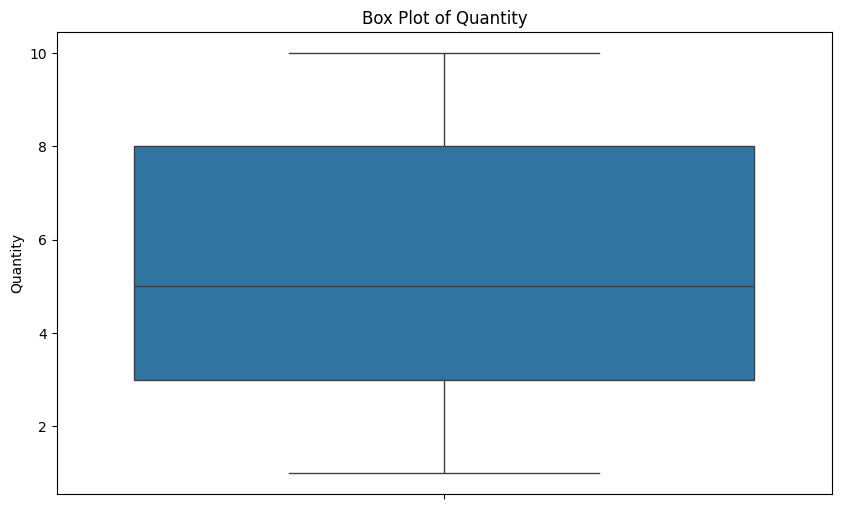

In [ ]:
# Box Plot for Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(y='Quantity', data=data)
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')
plt.show()

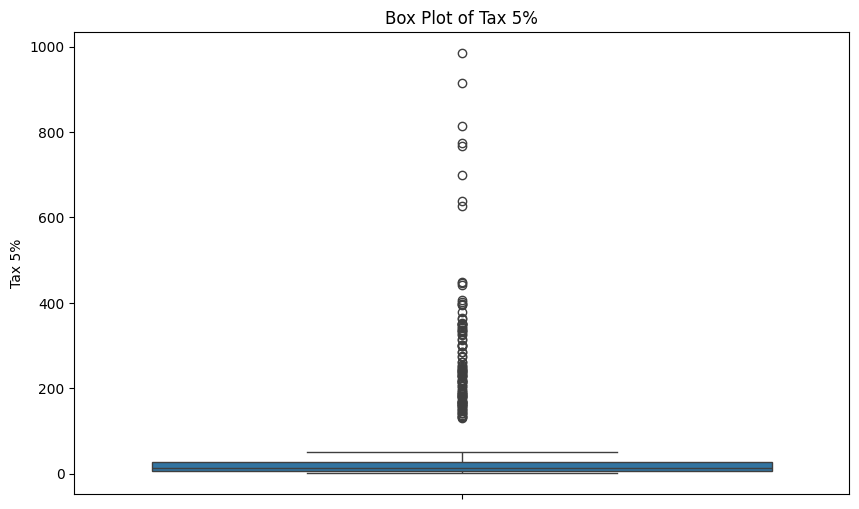

In [ ]:
# Box Plot for Tax 5%
plt.figure(figsize=(10, 6))
sns.boxplot(y='Tax 5%', data=data)
plt.title('Box Plot of Tax 5%')
plt.ylabel('Tax 5%')
plt.show()


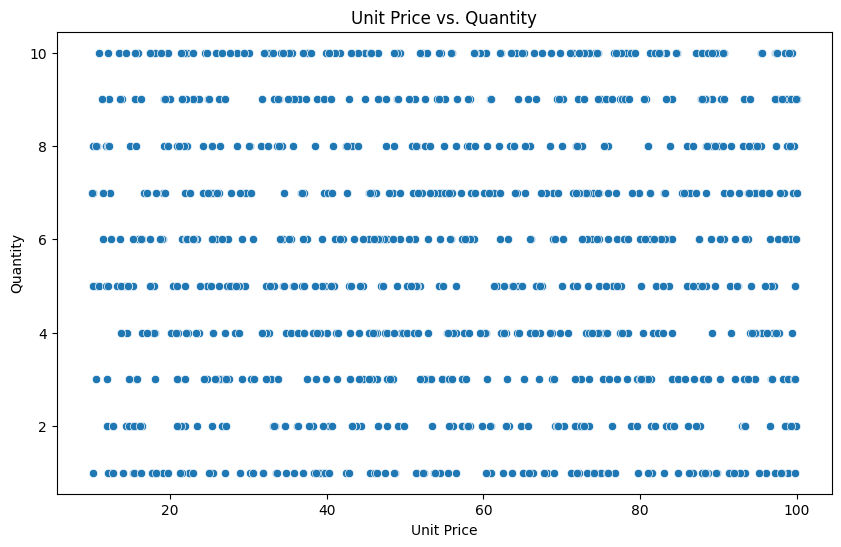

In [ ]:
# Scatter Plot for Unit Price vs. Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unit price', y='Quantity', data=data)
plt.title('Unit Price vs. Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()


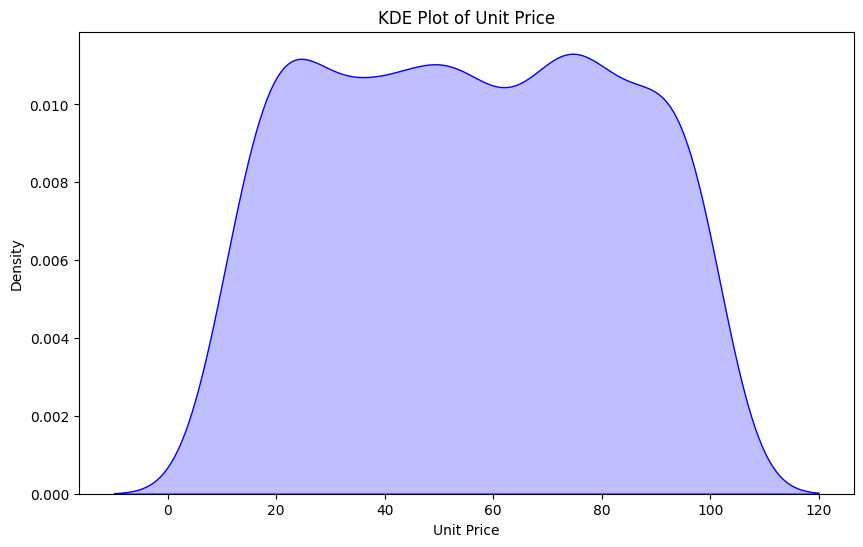

In [ ]:
# KDE Plot for Unit Price
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Unit price'], shade=True, color='blue')
plt.title('KDE Plot of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.show()


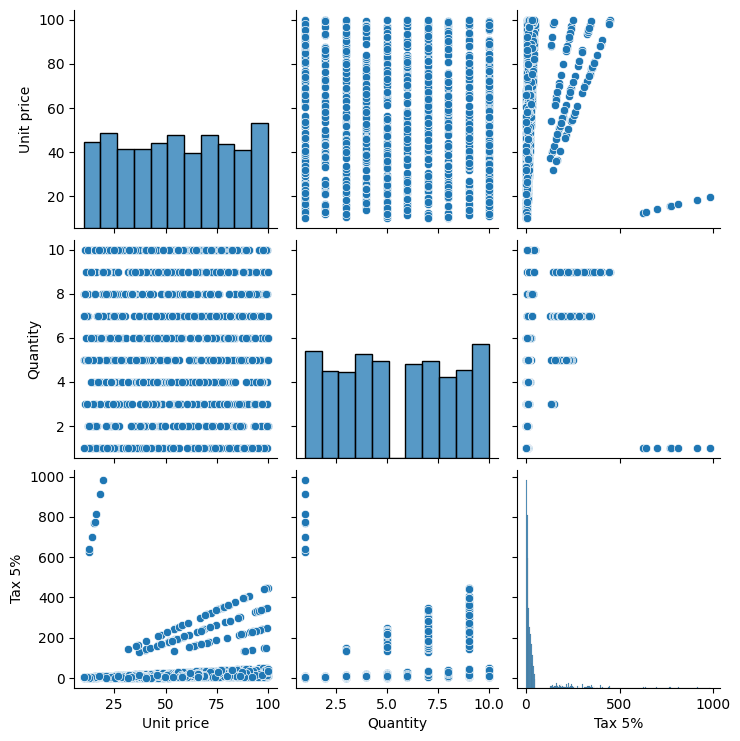

In [ ]:
# Pair Plot for Numerical Variables
import seaborn as sns
sns.pairplot(data[['Unit price', 'Quantity','Tax 5%']])
plt.show()


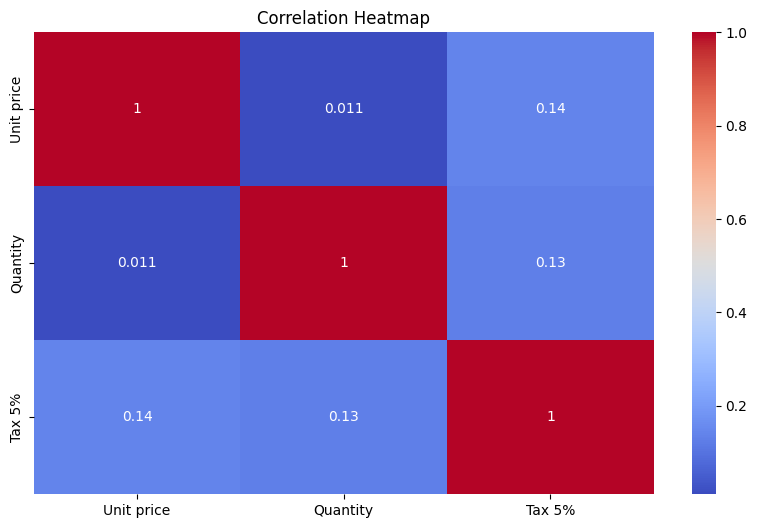

In [ ]:
#correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Unit price', 'Quantity', 'Tax 5%']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


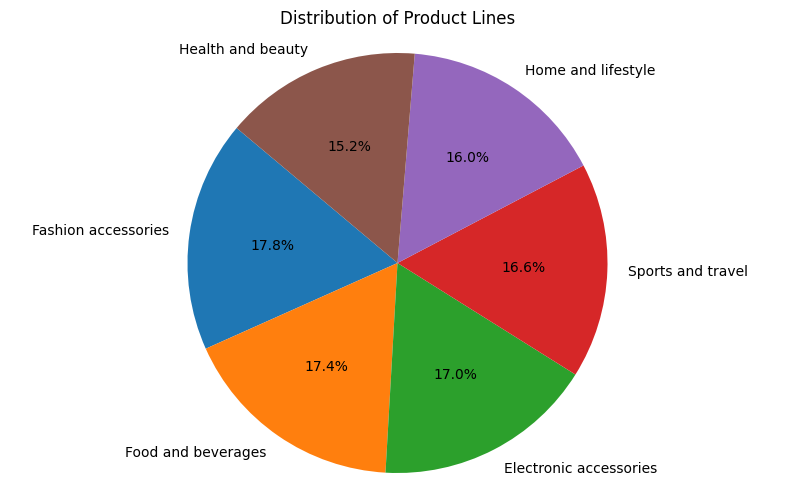

In [ ]:
 # Pie Chart for Product Line
product_line_counts = data['Product line'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(product_line_counts, labels=product_line_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Lines')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


# One-Sample T-Test
t_stat, p_val = stats.ttest_1samp(data['Unit price'], 50)
print(f'One-Sample T-Test: t-statistic={t_stat}, p-value={p_val}')
if p_val < 0.05:
    print("The mean 'Unit price' is significantly different from 50.")
else:
    print("The mean 'Unit price' is not significantly different from 50.")


# Two-Sample T-Test
male_customers = data[data['Gender'] == 'Male']['Unit price']
female_customers = data[data['Gender'] == 'Female']['Unit price']
t_stat, p_val = stats.ttest_ind(male_customers, female_customers)
print(f'Two-Sample T-Test: t-statistic={t_stat}, p-value={p_val}')
if p_val < 0.05:
    print("There is a significant difference in 'Unit price' between male and female customers.")
else:
    print("There is no significant difference in 'Unit price' between male and female customers.")




One-Sample T-Test: t-statistic=6.769994939739997, p-value=2.1931691091447766e-11
The mean 'Unit price' is significantly different from 50.
Two-Sample T-Test: t-statistic=0.48797163734606525, p-value=0.6256771156169185
There is no significant difference in 'Unit price' between male and female customers.


The one-sample t-test results indicate that the mean 'Unit price' is significantly different from 50, while the two-sample t-test results show no significant difference in 'Unit price' between male and female customers.

In [ ]:
# One-Way ANOVA
anova_result = stats.f_oneway(
    data[data['Product line'] == 'Health and beauty']['Unit price'],
    data[data['Product line'] == 'Electronic accessories']['Unit price'],
    data[data['Product line'] == 'Home and lifestyle']['Unit price']
)
print(f'One-Way ANOVA: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}')

One-Way ANOVA: F-statistic=0.1985177767347751, p-value=0.8200126204565864


Interpretation:
The ANOVA results indicate that there are no significant differences in 'Unit price' across the 'Health and beauty', 'Electronic accessories', and 'Home and lifestyle' product lines, as evidenced by a high p-value (0.82), which is greater than 0.05. Therefore, we fail to reject the null hypothesis.

In [ ]:
# Chi-Square Test of Independence
contingency_table = pd.crosstab(data['Gender'], data['Customer type'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("contingency_table",contingency_table)
print("Chi-square statistic:",chi2)
print("p-value:",p)

if p<0.05:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")



contingency_table Customer type  Member  Normal
Gender                       
Female            261     240
Male              240     259
Chi-square statistic: 1.4437075656374243
p-value: 0.22954031679077663
Fail to reject the null hypothesis


The Chi-Square Test of Independence results indicate that there is no significant association between Gender and Customer Type, as evidenced by a p-value of 0.23, which is greater than 0.05. Therefore, we fail to reject the null hypothesis.